# Exploratory analysis

So let us now look a bit at the data and see is there are variation of the variables across the states. 

In [6]:
#general
import numpy as np
import scipy
from matplotlib import pyplot as plt
%pylab inline
import pandas as pd
import MySQLdb
import os
import sys
sys.setrecursionlimit(3000)

Populating the interactive namespace from numpy and matplotlib


Loading in the data just for US. I'm limiting longitude and latitude to a range that covers continental US, since Alaska and Hawaii are not included in Yelp dataset. 

In [8]:
con=MySQLdb.connect(user=user, passwd=passwd, db=dbname, host=host)
df = pd.read_sql("SELECT * FROM business WHERE longitude <= -65 AND longitude >=-127.77 AND latitude >=24.52 AND latitude<=49.38", con)
print "data loaded"

data loaded


/Users/Lexa/anaconda/lib/python2.7/site-packages/pandas/io/sql.py:1474: Warning: Truncated incorrect DOUBLE value: 'longitude'
  cur.execute(*args)
/Users/Lexa/anaconda/lib/python2.7/site-packages/pandas/io/sql.py:1474: Warning: Truncated incorrect DOUBLE value: '"Scottsdale'
  cur.execute(*args)


Prepare categories for plotting. 

In [11]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['nice_cat'] = le.fit_transform(df.categories)
df.head(5)

,Unnamed: 0,X,categories,city,full_address,latitude,longitude,name,open,review_count,stars,state,type,zipcode,nice_cat
0,1,0,Doctors,Phoenix,"Phoenix, AZ 85018",33.499313,-111.983758,"Eric Goldberg, MD",True,9,3.5,AZ,business,85018,218
1,2,1,Health & Medical,Phoenix,"Phoenix, AZ 85018",33.499313,-111.983758,"Eric Goldberg, MD",True,9,3.5,AZ,business,85018,332
2,3,5488,Sandwiches,Phoenix,"Phoenix, AZ 85004",33.479542,-112.073418,Domino's Pizza,True,11,3.0,AZ,business,85004,615
3,4,5489,Pizza,Phoenix,"Phoenix, AZ 85004",33.479542,-112.073418,Domino's Pizza,True,11,3.0,AZ,business,85004,545
4,5,5490,Chicken Wings,Phoenix,"Phoenix, AZ 85004",33.479542,-112.073418,Domino's Pizza,True,11,3.0,AZ,business,85004,145


Let us do some exploratory analysis with the graphs. 

Difference between ranking of open and closed business. 

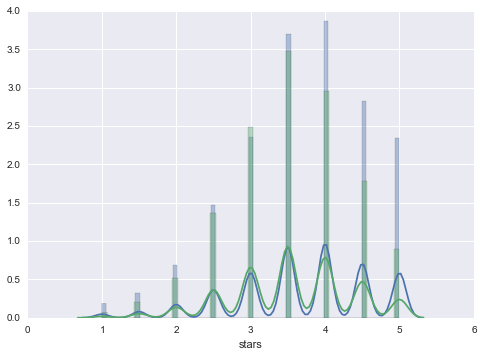

In [12]:
import seaborn as sns
for open in df.open.unique():
    sns.distplot(df[df.open == open].stars)

And same for review counts:

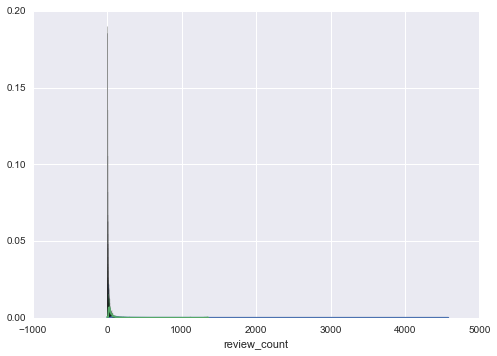

In [14]:
for open in df.open.unique():
    sns.distplot(df[df.open == open].review_count)

This kind of plot requires log scale so that we can see details. 

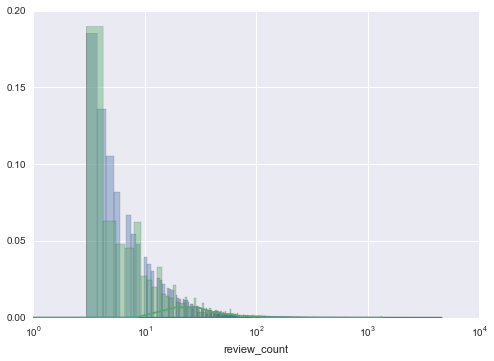

In [15]:
for open in df.open.unique():
    grid=sns.distplot(df[df.open == open].review_count)
    grid.set(xscale="log")

What happens when we get just some of the categories?<br>
Let us remove everything connected with the restoraunts. 

In [17]:
cat = ['Fitness & Instruction', 'Museums', 'Art Galleries','Bookstores', 'Adult Entertainment', 'Libraries',
        'Bikes','Comic Books', 'Bike Repair/Maintenance', 'Outdoor Gear',  'Bowling','Social Clubs', 'Pool Halls',
        'Karaoke','Motorcycle Repair', 'Motorcycle Dealers','Vape Shops', 'Sports Wear', 
       'Golf Equipment', 'Paintball','Go Karts', 'Race Tracks', 'Mini Golf','Arcades', 
       'Horseback Riding',  'Bike Rentals',  'Sports Clubs','Gun/Rifle Ranges','Guns & Ammo',  'Mountain Biking', 
       'Tennis', 'Rafting/Kayaking', 'Tattoo',  'Hookah Bars','Boxing', 'Soccer','Art Schools', 'Musical Instrument Services',
        'Leisure Centers', 'Psychics & Astrologers', 'Recreation Centers', 'Weight Loss Centers',  'Brewing Supplies',
      'Golf Equipment Shops','Climbing',  'Dog Parks',  'Skate Parks','Prosthetics','Skydiving', 'Art Classes',
       'Rehabilitation Center', 'Cycling Classes',  'Rock Climbing', 'Motorcycle Gear', 
       'Plus Size Fashion',  'Bike Sharing','Motorcycle Rental',
    'Organic Stores', 'Used Bookstore', ]

In [18]:
dfcat = df.loc[df['categories'].isin(cat)]

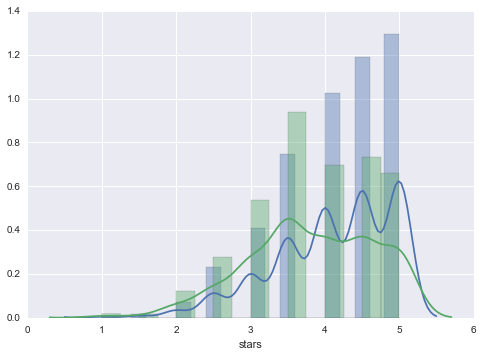

In [19]:
for open in dfcat.open.unique():
    sns.distplot(dfcat[dfcat.open == open].stars)

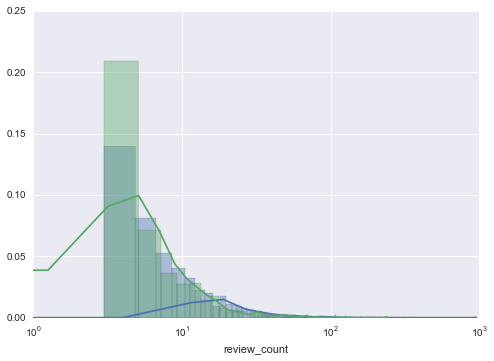

In [20]:
for open in dfcat.open.unique():
    grid=sns.distplot(dfcat[dfcat.open == open].review_count)
    grid.set(xscale="log")

Is there variation across the states for certain category?

In [21]:
dfg = dfcat.groupby(['state','categories']).count().reset_index()
dfcat.head(5)
        

,Unnamed: 0,X,categories,city,full_address,latitude,longitude,name,open,review_count,stars,state,type,zipcode,nice_cat
27,28,5513,Fitness & Instruction,Phoenix,"Phoenix, AZ 85004",33.470242,-112.074821,Central Park Square Atheltic Club,True,6,4.5,AZ,business,85004,271
66,67,5552,Museums,Phoenix,"Phoenix, AZ 85004",33.473182,-112.072935,The Heard Museum,True,111,4.0,AZ,business,85004,469
150,151,5636,Fitness & Instruction,Phoenix,"Phoenix, AZ 85004",33.448333,-112.074127,Renaissance Club,True,3,4.5,AZ,business,85004,271
216,217,5702,Art Galleries,Phoenix,"Phoenix, AZ 85004",33.458653,-112.067705,Eye Lounge,True,11,4.5,AZ,business,85004,38
273,274,5759,Art Galleries,Phoenix,"Phoenix, AZ 85004",33.440699,-112.070571,Bentley Projects,True,10,4.5,AZ,business,85004,38


A pair plot might give us some info.

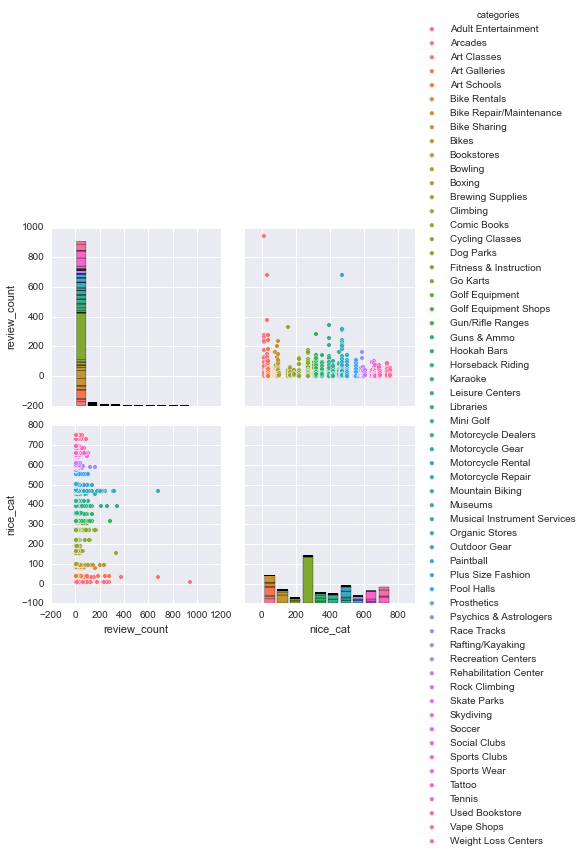

In [106]:
sns.pairplot(dfcat[['review_count', 'nice_cat', 'categories']], hue='categories')

Too many categories, let us take just few of them. 

In [22]:
cat2 = ['Golf Equipment', 'Bowling', 'Pool Halls', 'Cycling Classes', 'Skate Parks', 'Skydiving']
dfcat2 = df.loc[df['categories'].isin(cat2)]
dfcat2.head(5)

,Unnamed: 0,X,categories,city,full_address,latitude,longitude,name,open,review_count,stars,state,type,zipcode,nice_cat
1977,1978,7463,Bowling,Phoenix,"Phoenix, AZ 85016",33.495024,-112.015712,AMF Squaw Peak Lanes,False,21,3.0,AZ,business,85016,95
2133,2134,7619,Pool Halls,Phoenix,"Phoenix, AZ 85018",33.480317,-111.996744,Clicks Billiards,False,9,3.0,AZ,business,85018,555
2890,2891,8376,Bowling,Phoenix,"Phoenix, AZ 85020",33.566851,-112.055907,Sunset Bowl,False,15,4.0,AZ,business,85020,95
3585,3586,9071,Bowling,Phoenix,"Phoenix, AZ 85028",33.584789,-112.013290,AMF Shea Village Lanes,False,5,4.5,AZ,business,85028,95
3667,3668,9153,Golf Equipment,Phoenix,"Phoenix, AZ 85032",33.640955,-112.019518,Jerry's Golf Balls,True,5,5.0,AZ,business,85032,310


And let us remove Canada from the dataset

In [24]:
states = ['AZ', 'CA', 'IL', 'MA', 'MN', 'NC', 'NV', 'OR', 'PA', 'SC', 'WA', 'WI']
dfcat2 = dfcat2.loc[dfcat2['state'].isin(states)]

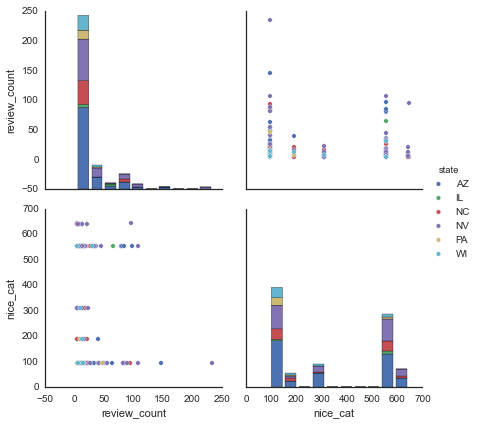

In [25]:
sns.pairplot(dfcat2[['review_count', 'nice_cat', 'state']], hue='state')

So there is a difference across the states. This might indicate either climate influence or difference influenced by population. <br> Let us see it rougly across the different states.

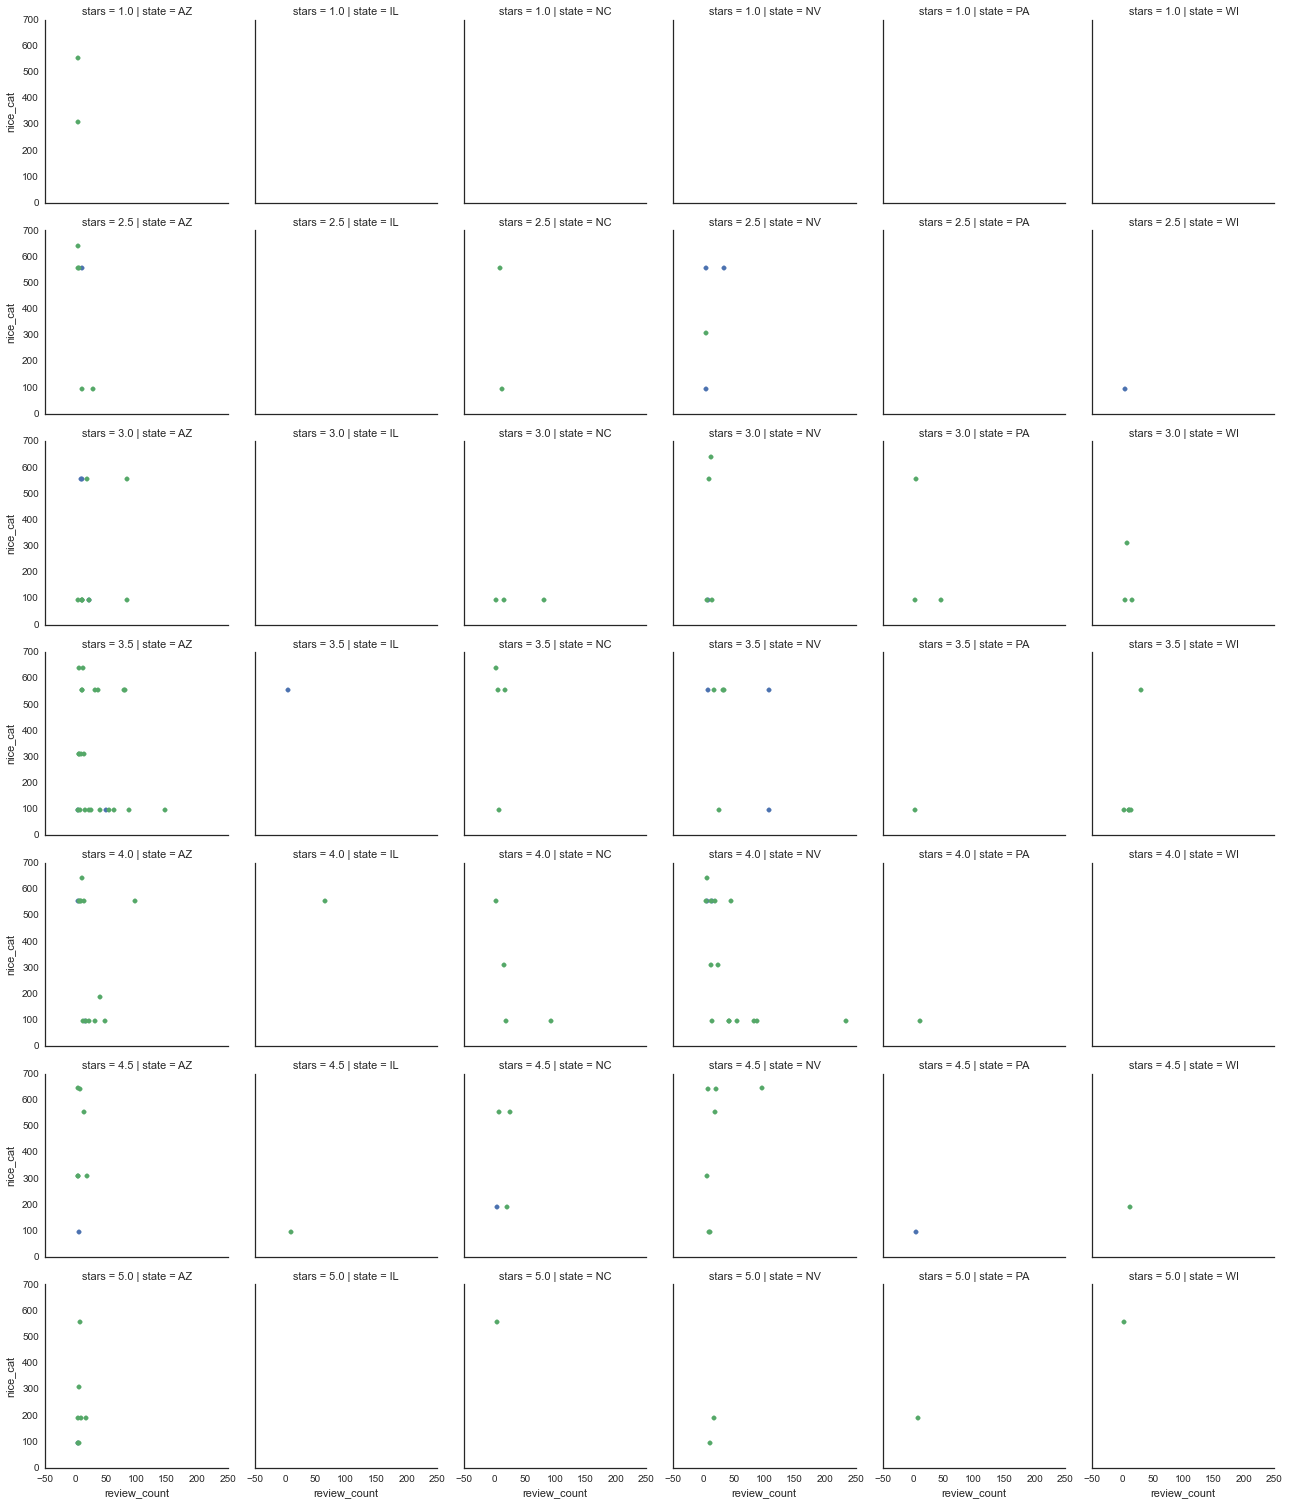

In [26]:
import matplotlib as mpl
sns.set(style="white")
np.random.seed(sum(map(ord, "axis_grids")))
#tips = dfcat2 #sns.load_dataset("dfcat2")
g = sns.FacetGrid(dfcat2, row="stars", col="state", hue="open")
g.map(plt.scatter, "review_count", "nice_cat");


So there is a variation of the popularity of the categories. I'll try to get census data to see is the variation connected with the demographic information. 
